In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import defaultdict
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, make_scorer
from scipy.special import expit
from sklearn.model_selection import GridSearchCV, validation_curve, RandomizedSearchCV
from sklearn.decomposition import PCA

In [2]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
from keras.regularizers import l2, l1

In [4]:
from keras.layers import Dropout

In [5]:
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier

In [6]:
df_track  = pd.read_csv('df_track_no_duplicates.csv', skipinitialspace=True)

In [7]:
value_map = {'reggae': 'latin', 'reggaeton': 'latin', 'latino': 'latin','honky-tonk':'latin',
             'electro': 'edm', 'house': 'edm','idm':'edm',
             'indie-pop': 'indie',
             'minimal-techno': 'techno', 'electronic':'techno','chicago-house':'techno','detroit-techno':'techno','deep-house':'techno','industrial':'techno','hardstyle':'techno',
             'dub': 'dubstep',
             'progressive-house': 'trance',
             'samba': 'brazil', 'pagode': 'brazil', 'forro': 'brazil', 'sertanejo': 'brazil','mpb':'brazil',
             'rockabilly': 'rock','rock-n-roll':'rock',
             'world-music': 'ambient',
             'cantopop': 'mandopop',
             'synth-pop':'pop','pop-film':'pop',
             'metalcore': 'metal','death-metal':'metal','black-metal':'metal','eavy-metal':'metal','grindcore':'metal','grunge':'metal',
             'punk-rock': 'punk',
             'alt-rock': 'rock', 'alternative': 'rock','power-pop':'rock','psych-rock':'rock','hardcore':'rock','hard-rock':'rock',
             'j-pop':'japan','j-rock':'japan','anime':'japan','j-dance':'japan','j-idol':'japan',
             'classical':'opera',
             'sad':'emo','chill':'emo','goth':'emo',
             'dancehall':'dance','disco':'dance','party':'dance',
             'disney':'kids','children':'kids',
             'breakbeat':'hip-hop','drum-and-bass':'hip-hop','r-n-b':'hip-hop','trip-hop':'hip-hop','club':'hip-hop','ska':'hip-hop',
             'acoustic':'guitar',
             'soul':'blues',
             'salsa':'spanish','tango':'spanish',
             } 

df_track['genre_cluster'] = df_track['genre'].replace(value_map)

In [8]:
df_track.columns

Index(['id', 'name', 'disc_number', 'duration_sec', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'fade_out_%', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_beats', 'n_bars', 'genre', 'genre_cluster'],
      dtype='object')

In [9]:
columns = ['duration_sec', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'fade_out_%', 
           'n_beats']

df_sub = df_track[columns]
X = df_sub.values
y = df_track['genre_cluster'].values
X.shape, y.shape

((83612, 13), (83612,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58528, 13), (25084, 13), (58528,), (25084,))

In [11]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Keras

In [22]:
n_classes = len(df_track['genre_cluster'].unique())
def build_model():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [23]:
model1 = build_model()
model1.summary()

C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 50)                  │           3,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
es = EarlyStopping(monitor='val_accuracy', patience=50, verbose=True)
mc = ModelCheckpoint('best_model_NOREG.keras', monitor='val_accuracy', save_best_only=True)

In [30]:
clf = KerasClassifier(build_model, callbacks=[es, mc])
clf.fit(X_train, y_train, validation_split=0.2, epochs=500)

NameError: name 'build_model' is not defined

In [14]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

784/784 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step
Accuracy 0.39076702280338066
              precision    recall  f1-score   support

    afrobeat       0.32      0.21      0.25       292
     ambient       0.40      0.29      0.34       554
   bluegrass       0.38      0.47      0.42       293
       blues       0.15      0.09      0.11       347
      brazil       0.47      0.67      0.55      1454
     british       0.08      0.01      0.02       167
      comedy       0.88      0.80      0.84       298
     country       0.24      0.18      0.20       159
       dance       0.34      0.27      0.30       686
     dubstep       0.31      0.28      0.29       317
         edm       0.28      0.24      0.26       639
         emo       0.29      0.34      0.32       926
        folk       0.46      0.04      0.07       153
      french       0.24      0.12      0.16       273
        funk       0.41      0.19      0.26       177
      garage       0.22      0.11      0.14       260
      ger

# L2 Regularization

In [15]:
from keras.regularizers import l2, l1

def build_L2_model():
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu',
                    input_shape=(n_feature,), kernel_regularizer=l2(0.001)))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(n_classes))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [16]:
mc = ModelCheckpoint('best_model_L2.keras', monitor='val_accuracy', save_best_only=True)

L2_model = KerasClassifier(build_L2_model, callbacks=[es,mc])
L2_model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500


C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0323 - loss: 5.4872 - val_accuracy: 0.0147 - val_loss: 3.9340
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0156 - loss: 3.9337 - val_accuracy: 0.0151 - val_loss: 3.9327
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0164 - loss: 3.9323 - val_accuracy: 0.0159 - val_loss: 3.9306
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0166 - loss: 3.9299 - val_accuracy: 0.0173 - val_loss: 3.9276
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0164 - loss: 3.9274 - val_accuracy: 0.0060 - val_loss: 3.9249
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0077 - loss: 3.9243 - val_accuracy: 0.0062 - val_loss: 3.9225
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0074 - loss: 3.9218 - val_accuracy: 0.0062 - val_loss: 3.9199
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0073 - loss: 3.9193 - val_

KerasClassifier(
	model=<function build_L2_model at 0x000001A91C3FBCE0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x000001A911A91510>, <keras.src.callbacks.model_checkpoint.ModelCheckpoint object at 0x000001A91B4AD010>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [19]:
y_pred = L2_model.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

784/784 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step
Accuracy 0.007255621113060118


C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    afrobeat       0.00      0.00      0.00       292
     ambient       0.00      0.00      0.00       554
   bluegrass       0.00      0.00      0.00       293
       blues       0.00      0.00      0.00       347
      brazil       0.00      0.00      0.00      1454
     british       0.00      0.00      0.00       167
      comedy       0.00      0.00      0.00       298
     country       0.00      0.00      0.00       159
       dance       0.00      0.00      0.00       686
     dubstep       0.00      0.00      0.00       317
         edm       0.00      0.00      0.00       639
         emo       0.00      0.00      0.00       926
        folk       0.00      0.00      0.00       153
      french       0.00      0.00      0.00       273
        funk       0.00      0.00      0.00       177
      garage       0.00      0.00      0.00       260
      german       0.00      0.00      0.00       219
      gospel       0.00    

C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Dropout

In [17]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,)))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(n_classes))

    #compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [18]:
mc = ModelCheckpoint('best_model_DROPOUT.keras', monitor='val_accuracy', save_best_only=True)

DROPOUT_model = KerasClassifier(build_DROPOUT_model, callbacks=[es,mc])
DROPOUT_model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500


C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0424 - loss: 5.8956 - val_accuracy: 0.0238 - val_loss: 3.9120
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0261 - loss: 3.9125 - val_accuracy: 0.0237 - val_loss: 3.9120
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0209 - loss: 3.9125 - val_accuracy: 0.0237 - val_loss: 3.9120
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0205 - loss: 3.9123 - val_accuracy: 0.0242 - val_loss: 3.9120
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0201 - loss: 3.9120 - val_accuracy: 0.0242 - val_loss: 3.9120
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0237 - loss: 3.9128 - val_accuracy: 0.0286 - val_loss: 3.9120
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0304 - loss: 3.9120 - val_accuracy: 0.0286 - val_loss: 3.9120
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0315 - loss: 3.9120 - val_

KerasClassifier(
	model=<function build_DROPOUT_model at 0x000001A91B6207C0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x000001A911A91510>, <keras.src.callbacks.model_checkpoint.ModelCheckpoint object at 0x000001A91B7828D0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [20]:
y_pred = DROPOUT_model.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

784/784 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step
Accuracy 0.028623823951522884


C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    afrobeat       0.01      0.08      0.02       292
     ambient       0.00      0.00      0.00       554
   bluegrass       0.00      0.00      0.00       293
       blues       0.00      0.00      0.00       347
      brazil       0.00      0.00      0.00      1454
     british       0.00      0.00      0.00       167
      comedy       0.00      0.00      0.00       298
     country       0.00      0.00      0.00       159
       dance       0.00      0.00      0.00       686
     dubstep       0.00      0.00      0.00       317
         edm       0.00      0.00      0.00       639
         emo       0.04      0.01      0.01       926
        folk       0.00      0.00      0.00       153
      french       0.00      0.00      0.00       273
        funk       0.00      0.00      0.00       177
      garage       0.00      0.00      0.00       260
      german       0.00      0.00      0.00       219
      gospel       0.00    

C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Tuning

In [24]:
def build_model(meta, hidden_layer_sizes, activation):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation))
    model.add(keras.layers.Dense(n_classes_, activation="softmax"))
    return model

In [25]:
clf = KerasClassifier(
    model=build_model,
    loss="sparse_categorical_crossentropy",
    verbose=False
)

In [26]:
params = {
    'optimizer__learning_rate': [0.001, 0.01, 0.1, 1],
    'model__hidden_layer_sizes': [(100, 100, 100), (50, 50, 50), (10, 10, 10),
                                  (100, 50, 10), (10, 10, 10), (10, 10)],
    'model__activation': ['relu', 'tanh'],
    'optimizer': ["adam", "sgd"],
    'epochs': [10, 50, 100, 200]
}

gs = RandomizedSearchCV(clf, params, scoring='accuracy', verbose=True, n_iter=15, cv=3)

In [28]:
gs.fit(X_train, y_train)

print(gs.best_score_, gs.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\emasc\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\emasc\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "C:\Users\emasc\anaconda3\Lib\site-package

0.38719936652227177 {'optimizer__learning_rate': 0.01, 'optimizer': 'sgd', 'model__hidden_layer_sizes': (100, 100, 100), 'model__activation': 'relu', 'epochs': 100}


In [ ]:
params = {
    'optimizer__learning_rate': [0.001, 0.01, 0.1, 1],
    'model__hidden_layer_sizes': [(100, 100, 100), (128, 64, 50), (10, 10, 10),
                                  (100, 50, 10), (10, 10, 10), (10, 10)],
    'model__activation': ['relu', 'tanh'],
    'optimizer': ["adam", "sgd"],
    'epochs': [10, 50, 100, 200]
}

gs = RandomizedSearchCV(clf, params, scoring='accuracy', verbose=True, n_iter=15, cv=3)

# Lavoriamo sulla migliore

Keras con solo uno strato in più e cambiando il numero di neuroni

In [9]:
n_classes = len(df_track['genre_cluster'].unique())
def build_model():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(256, input_dim=n_feature, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [10]:
model1 = build_model()
model1.summary()

C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           3,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,986 (187.45 KB)

 Trainable params: 47,986 (187.45 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
es = EarlyStopping(monitor='val_accuracy', patience=50, verbose=True)
mc = ModelCheckpoint('best_model_NOREG.keras', monitor='val_accuracy', save_best_only=True)

In [12]:
clf = KerasClassifier(build_model, callbacks=[es, mc])
clf.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500


C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2295 - loss: 2.9249 - val_accuracy: 0.3287 - val_loss: 2.4729
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3333 - loss: 2.4380 - val_accuracy: 0.3458 - val_loss: 2.3814
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3557 - loss: 2.3299 - val_accuracy: 0.3596 - val_loss: 2.3293
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3787 - loss: 2.2578 - val_accuracy: 0.3642 - val_loss: 2.2823
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3850 - loss: 2.2046 - val_accuracy: 0.3725 - val_loss: 2.2561
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3917 - loss: 2.1741 - val_accuracy: 0.3792 - val_loss: 2.2429
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4010 - loss: 2.1352 - val_accuracy: 0.3786 - val_loss: 2.2247
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4017 - loss: 2.1182 - val_

KerasClassifier(
	model=<function build_model at 0x000002475D84E340>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x0000024706167450>, <keras.src.callbacks.model_checkpoint.ModelCheckpoint object at 0x0000024709A1AA10>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [13]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

784/784 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy 0.3747010046244618
              precision    recall  f1-score   support

    afrobeat       0.26      0.24      0.25       292
     ambient       0.30      0.28      0.29       554
   bluegrass       0.39      0.33      0.36       293
       blues       0.13      0.05      0.08       347
      brazil       0.43      0.66      0.53      1454
     british       0.13      0.07      0.09       167
      comedy       0.80      0.81      0.81       298
     country       0.20      0.17      0.18       159
       dance       0.24      0.34      0.28       686
     dubstep       0.26      0.21      0.24       317
         edm       0.28      0.24      0.26       639
         emo       0.31      0.27      0.29       926
        folk       0.18      0.07      0.10       153
      french       0.22      0.12      0.16       273
        funk       0.29      0.30      0.30       177
      garage       0.17      0.08      0.11       260
      german

Proviamo a metterci uno strato di dropout

In [15]:
n_classes = len(df_track['genre_cluster'].unique())
def build_model_DROP():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(256, input_dim=n_feature, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [17]:
mc = ModelCheckpoint('best_model_DROPOUT01.keras', monitor='val_accuracy', save_best_only=True)

clfDROP = KerasClassifier(build_model_DROP, callbacks=[es, mc])
clfDROP.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500


C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2294 - loss: 2.9643 - val_accuracy: 0.3195 - val_loss: 2.4838
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3219 - loss: 2.4928 - val_accuracy: 0.3348 - val_loss: 2.4002
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3448 - loss: 2.3954 - val_accuracy: 0.3562 - val_loss: 2.3207
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3576 - loss: 2.3242 - val_accuracy: 0.3639 - val_loss: 2.2839
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3677 - loss: 2.2729 - val_accuracy: 0.3669 - val_loss: 2.2741
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3814 - loss: 2.2361 - val_accuracy: 0.3787 - val_loss: 2.2413
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3860 - loss: 2.2059 - val_accuracy: 0.3757 - val_loss: 2.2611
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3907 - loss: 2.1892 - val_

KerasClassifier(
	model=<function build_model_DROP at 0x00000247086580E0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x0000024706167450>, <keras.src.callbacks.model_checkpoint.ModelCheckpoint object at 0x000002471796E1D0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [18]:
y_pred = clfDROP.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

784/784 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy 0.3813187689363738
              precision    recall  f1-score   support

    afrobeat       0.32      0.15      0.20       292
     ambient       0.32      0.34      0.33       554
   bluegrass       0.33      0.43      0.37       293
       blues       0.13      0.12      0.13       347
      brazil       0.46      0.63      0.53      1454
     british       0.16      0.05      0.08       167
      comedy       0.91      0.80      0.85       298
     country       0.19      0.18      0.18       159
       dance       0.27      0.27      0.27       686
     dubstep       0.27      0.18      0.21       317
         edm       0.31      0.26      0.28       639
         emo       0.31      0.28      0.30       926
        folk       0.21      0.05      0.08       153
      french       0.20      0.11      0.14       273
        funk       0.29      0.26      0.28       177
      garage       0.16      0.07      0.10       260
      german

Ci metto L2 regularization

In [11]:
n_classes = len(df_track['genre_cluster'].unique())
def build_model_DROPl2():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(256, input_dim=n_feature, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.001)))
    model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.1))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [14]:
mc = ModelCheckpoint('best_model_DROPOUTl2.keras', monitor='val_accuracy', save_best_only=True)

clfDROPl2 = KerasClassifier(build_model_DROPl2, callbacks=[es, mc])
clfDROPl2.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500


C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2206 - loss: 3.2223 - val_accuracy: 0.3098 - val_loss: 2.6949
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3150 - loss: 2.6867 - val_accuracy: 0.3235 - val_loss: 2.5933
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3259 - loss: 2.6032 - val_accuracy: 0.3390 - val_loss: 2.5395
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3339 - loss: 2.5599 - val_accuracy: 0.3393 - val_loss: 2.5276
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3396 - loss: 2.5255 - val_accuracy: 0.3448 - val_loss: 2.5041
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3433 - loss: 2.5114 - val_accuracy: 0.3500 - val_loss: 2.4844
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3494 - loss: 2.4878 - val_accuracy: 0.3524 - val_loss: 2.4627
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3550 - loss: 2.4685 - val_

KerasClassifier(
	model=<function build_model_DROPl2 at 0x0000021560D24040>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x00000215656AEE10>, <keras.src.callbacks.model_checkpoint.ModelCheckpoint object at 0x0000021562629510>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [15]:
y_pred = clfDROPl2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

784/784 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step
Accuracy 0.4018497847233296
              precision    recall  f1-score   support

    afrobeat       0.30      0.23      0.26       292
     ambient       0.35      0.27      0.31       554
   bluegrass       0.46      0.45      0.46       293
       blues       0.22      0.04      0.06       347
      brazil       0.46      0.71      0.55      1454
     british       0.17      0.02      0.04       167
      comedy       0.88      0.81      0.84       298
     country       0.21      0.16      0.18       159
       dance       0.29      0.35      0.32       686
     dubstep       0.38      0.15      0.21       317
         edm       0.31      0.34      0.32       639
         emo       0.30      0.32      0.31       926
        folk       0.29      0.03      0.05       153
      french       0.21      0.15      0.17       273
        funk       0.49      0.23      0.31       177
      garage       0.27      0.05      0.08       260
      germ

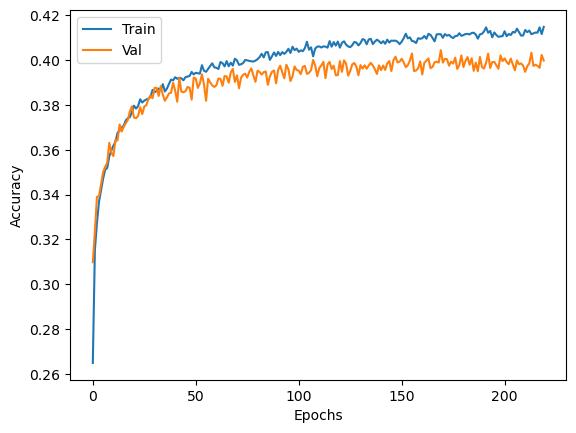

In [16]:
history = clfDROPl2.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

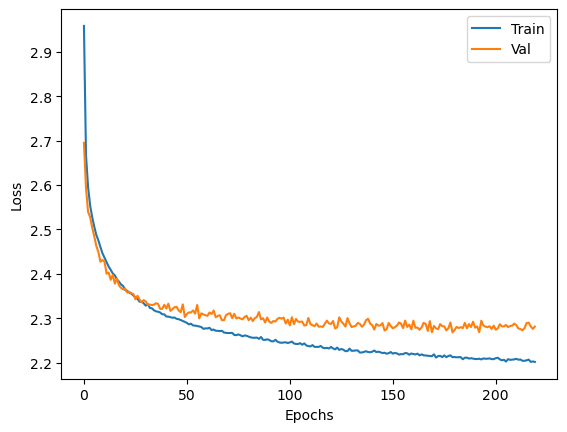

In [17]:
history = clfDROPl2.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Levo un layer, gioco con parametri

 0.38719936652227177 {'optimizer__learning_rate': 0.01, 'optimizer': 'sgd', 'model__hidden_layer_sizes': (100, 100, 100), 'model__activation': 'relu', 'epochs': 100}

In [27]:
n_classes = len(df_track['genre_cluster'].unique())
def lay3DROPl2():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="sgd", metrics=['accuracy'])
    return model

In [28]:
mc = ModelCheckpoint('best_model_DROPOUTl2.keras', monitor='val_accuracy', save_best_only=True)

clfDROPl2 = KerasClassifier(lay3DROPl2, callbacks=[es, mc])
clfDROPl2.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500


C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1034 - loss: 3.6651 - val_accuracy: 0.2046 - val_loss: 3.0974
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2163 - loss: 3.0547 - val_accuracy: 0.2482 - val_loss: 2.8751
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2427 - loss: 2.8896 - val_accuracy: 0.2737 - val_loss: 2.7646
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2666 - loss: 2.7954 - val_accuracy: 0.2899 - val_loss: 2.6986
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2766 - loss: 2.7345 - val_accuracy: 0.2971 - val_loss: 2.6525
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2874 - loss: 2.6871 - val_accuracy: 0.3063 - val_loss: 2.6169
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2975 - loss: 2.6544 - val_accuracy: 0.3127 - val_loss: 2.5909
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3050 - loss: 2.6166 - val_

KerasClassifier(
	model=<function lay3DROPl2 at 0x000002471F581760>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x0000024706167450>, <keras.src.callbacks.model_checkpoint.ModelCheckpoint object at 0x0000024720D55190>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [29]:
y_pred = clfDROPl2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

784/784 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy 0.3746212725243183


C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    afrobeat       0.31      0.14      0.19       292
     ambient       0.33      0.30      0.31       554
   bluegrass       0.41      0.33      0.37       293
       blues       0.10      0.03      0.04       347
      brazil       0.42      0.71      0.53      1454
     british       0.71      0.03      0.06       167
      comedy       0.90      0.81      0.85       298
     country       0.25      0.13      0.17       159
       dance       0.27      0.26      0.27       686
     dubstep       0.27      0.16      0.20       317
         edm       0.26      0.24      0.25       639
         emo       0.32      0.31      0.31       926
        folk       0.25      0.01      0.01       153
      french       0.17      0.01      0.03       273
        funk       0.25      0.19      0.21       177
      garage       0.35      0.03      0.05       260
      german       0.00      0.00      0.00       219
      gospel       0.27    

C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# ennesima prova

In [26]:
n_classes = len(df_track['genre_cluster'].unique())
def pazzo():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(256, input_dim=n_feature, activation='tanh', kernel_regularizer=l2(0.001)))
    model.add(Dense(128, activation='tanh', kernel_regularizer=l2(0.001)))
    model.add(Dense(64, activation='tanh',kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.1))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [27]:
#mc = ModelCheckpoint('best_model_DROPOUTl2.keras', monitor='val_accuracy', save_best_only=True)

pazzo = KerasClassifier(pazzo, callbacks=[es, mc])
pazzo.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500


C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2362 - loss: 3.1816 - val_accuracy: 0.2951 - val_loss: 2.7396
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3025 - loss: 2.7278 - val_accuracy: 0.3104 - val_loss: 2.6350
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3138 - loss: 2.6449 - val_accuracy: 0.3230 - val_loss: 2.5797
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3181 - loss: 2.6109 - val_accuracy: 0.3285 - val_loss: 2.5516
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3288 - loss: 2.5831 - val_accuracy: 0.3379 - val_loss: 2.5221
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3282 - loss: 2.5538 - val_accuracy: 0.3379 - val_loss: 2.5140
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3298 - loss: 2.5635 - val_accuracy: 0.3408 - val_loss: 2.5087
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3353 - loss: 2.5451 - val_

KerasClassifier(
	model=<function pazzo at 0x000002157593EC00>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x00000215656AEE10>, <keras.src.callbacks.model_checkpoint.ModelCheckpoint object at 0x0000021562629510>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [28]:
y_pred = pazzo.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

784/784 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step
Accuracy 0.37836868123106365
              precision    recall  f1-score   support

    afrobeat       0.28      0.15      0.20       292
     ambient       0.27      0.30      0.28       554
   bluegrass       0.36      0.40      0.38       293
       blues       0.08      0.03      0.04       347
      brazil       0.45      0.69      0.54      1454
     british       0.33      0.01      0.01       167
      comedy       0.90      0.81      0.85       298
     country       0.24      0.19      0.21       159
       dance       0.39      0.16      0.23       686
     dubstep       0.44      0.09      0.14       317
         edm       0.25      0.25      0.25       639
         emo       0.35      0.28      0.31       926
        folk       0.27      0.04      0.07       153
      french       0.36      0.05      0.09       273
        funk       0.34      0.19      0.25       177
      garage       0.29      0.01      0.01       260
      ger

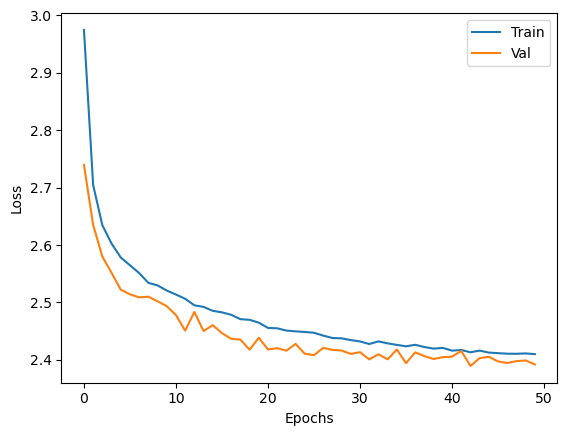

In [29]:
history = pazzo.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/500


C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2260 - loss: 4.4279 - val_accuracy: 0.2621 - val_loss: 3.0557
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2603 - loss: 3.0232 - val_accuracy: 0.2709 - val_loss: 2.9113
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2779 - loss: 2.8948 - val_accuracy: 0.2879 - val_loss: 2.8282
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2863 - loss: 2.8241 - val_accuracy: 0.2913 - val_loss: 2.7851
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2930 - loss: 2.7964 - val_accuracy: 0.2966 - val_loss: 2.7390
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2954 - loss: 2.7582 - val_accuracy: 0.2988 - val_loss: 2.7225
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3003 - loss: 2.7465 - val_accuracy: 0.3088 - val_loss: 2.7017
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3033 - loss: 2.7251 - val_

C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    afrobeat       0.36      0.13      0.19       292
     ambient       0.27      0.38      0.32       554
   bluegrass       0.35      0.32      0.33       293
       blues       0.07      0.01      0.02       347
      brazil       0.42      0.69      0.52      1454
     british       0.00      0.00      0.00       167
      comedy       0.92      0.80      0.85       298
     country       0.21      0.24      0.23       159
       dance       0.25      0.27      0.26       686
     dubstep       0.21      0.28      0.24       317
         edm       0.22      0.17      0.19       639
         emo       0.24      0.36      0.29       926
        folk       0.00      0.00      0.00       153
      french       0.00      0.00      0.00       273
        funk       0.34      0.18      0.24       177
      garage       0.54      0.03      0.05       260
      german       0.00      0.00      0.00       219
      gospel       0.36    

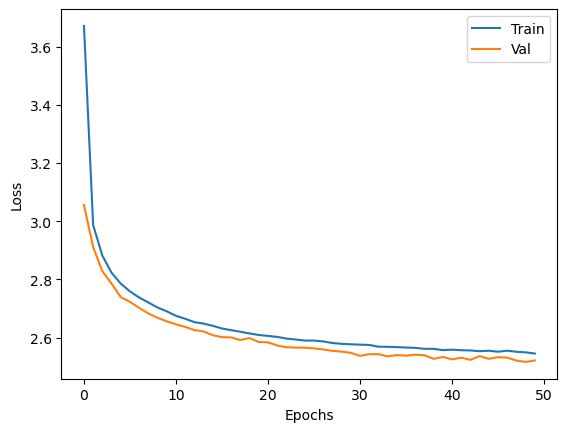

In [30]:
def pazzo1():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(256, input_dim=n_feature, activation='tanh', kernel_regularizer=l1(0.001)))
    model.add(Dense(128, activation='tanh', kernel_regularizer=l1(0.001)))
    model.add(Dense(64, activation='tanh',kernel_regularizer=l1(0.001)))
    model.add(Dropout(0.1))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model


pazzo1 = KerasClassifier(pazzo1, callbacks=[es])
pazzo1.fit(X_train, y_train, validation_split=0.2, epochs=500)

y_pred = pazzo1.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

history = pazzo1.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/500


C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2407 - loss: 2.9722 - val_accuracy: 0.3113 - val_loss: 2.5857
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3065 - loss: 2.5843 - val_accuracy: 0.3356 - val_loss: 2.4614
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3348 - loss: 2.4788 - val_accuracy: 0.3549 - val_loss: 2.4085
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3503 - loss: 2.4043 - val_accuracy: 0.3542 - val_loss: 2.3843
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3574 - loss: 2.3898 - val_accuracy: 0.3615 - val_loss: 2.3591
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3616 - loss: 2.3576 - val_accuracy: 0.3629 - val_loss: 2.3493
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3642 - loss: 2.3431 - val_accuracy: 0.3708 - val_loss: 2.3239
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3736 - loss: 2.3186 - val_

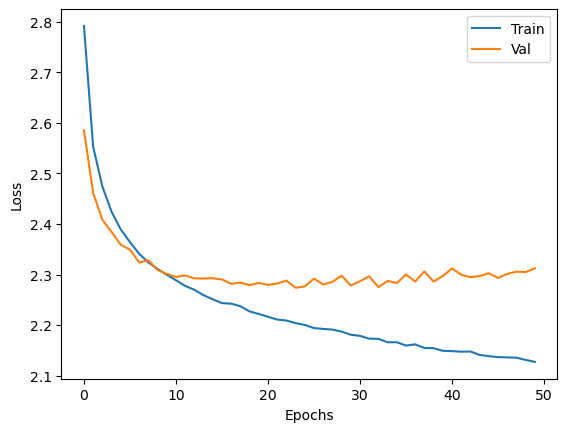

In [33]:
def pazzo2():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(256, input_dim=n_feature, activation='tanh', kernel_regularizer=l2(0.0001)))
    model.add(Dense(128, activation='tanh', kernel_regularizer=l2(0.0001)))
    model.add(Dense(64, activation='tanh',kernel_regularizer=l2(0.0001)))
    model.add(Dropout(0.1))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model


pazzo2 = KerasClassifier(pazzo2, callbacks=[es])
pazzo2.fit(X_train, y_train, validation_split=0.2, epochs=500)

y_pred = pazzo2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

history = pazzo2.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/500


C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2288 - loss: 2.9880 - val_accuracy: 0.3270 - val_loss: 2.4977
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3248 - loss: 2.4984 - val_accuracy: 0.3404 - val_loss: 2.4279
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3444 - loss: 2.4197 - val_accuracy: 0.3552 - val_loss: 2.3726
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3553 - loss: 2.3659 - val_accuracy: 0.3674 - val_loss: 2.3329
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3701 - loss: 2.3202 - val_accuracy: 0.3731 - val_loss: 2.3094
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3799 - loss: 2.2882 - val_accuracy: 0.3735 - val_loss: 2.2954
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3835 - loss: 2.2742 - val_accuracy: 0.3764 - val_loss: 2.2898
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3862 - loss: 2.2511 - val_

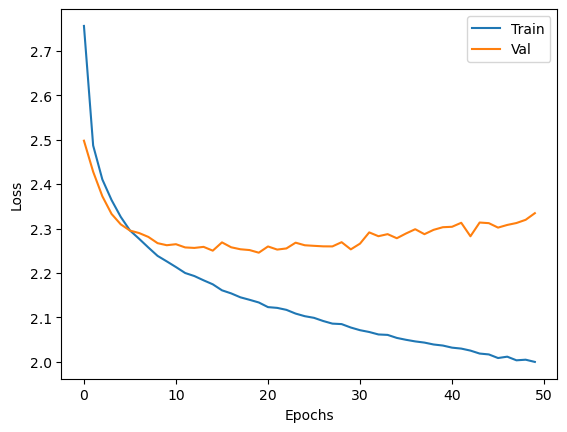

In [34]:
def pazzo3():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(256, input_dim=n_feature, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.0001)))
    model.add(Dropout(0.1))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model


pazzo3 = KerasClassifier(pazzo3, callbacks=[es])
pazzo3.fit(X_train, y_train, validation_split=0.2, epochs=500)

y_pred = pazzo3.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

history = pazzo3.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/500


C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1873 - loss: 3.2122 - val_accuracy: 0.3021 - val_loss: 2.6280
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2755 - loss: 2.7389 - val_accuracy: 0.3239 - val_loss: 2.5124
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3003 - loss: 2.6418 - val_accuracy: 0.3321 - val_loss: 2.4564
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3179 - loss: 2.5926 - val_accuracy: 0.3401 - val_loss: 2.4334
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3202 - loss: 2.5602 - val_accuracy: 0.3486 - val_loss: 2.4007
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3279 - loss: 2.5318 - val_accuracy: 0.3483 - val_loss: 2.3883
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3319 - loss: 2.5161 - val_accuracy: 0.3509 - val_loss: 2.3855
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3411 - loss: 2.4849 - val_

C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    afrobeat       0.35      0.14      0.20       292
     ambient       0.32      0.38      0.35       554
   bluegrass       0.48      0.40      0.44       293
       blues       0.14      0.01      0.02       347
      brazil       0.49      0.66      0.56      1454
     british       0.00      0.00      0.00       167
      comedy       0.95      0.79      0.86       298
     country       0.32      0.05      0.09       159
       dance       0.26      0.34      0.29       686
     dubstep       0.34      0.20      0.25       317
         edm       0.37      0.25      0.30       639
         emo       0.30      0.33      0.32       926
        folk       1.00      0.01      0.01       153
      french       0.27      0.10      0.15       273
        funk       0.45      0.24      0.32       177
      garage       0.18      0.01      0.01       260
      german       0.40      0.02      0.03       219
      gospel       0.28    

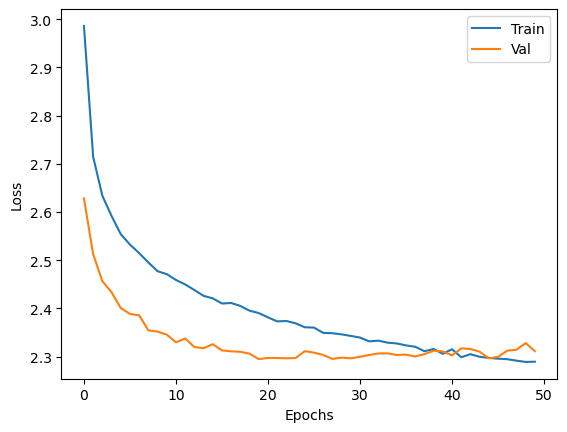

In [35]:
def pazzo4():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(256, input_dim=n_feature, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.0001)))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model


pazzo4 = KerasClassifier(pazzo4, callbacks=[es])
pazzo4.fit(X_train, y_train, validation_split=0.2, epochs=500)

y_pred = pazzo4.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

history = pazzo4.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/500


C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2019 - loss: 3.1161 - val_accuracy: 0.3185 - val_loss: 2.5469
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2962 - loss: 2.6254 - val_accuracy: 0.3361 - val_loss: 2.4555
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3171 - loss: 2.5369 - val_accuracy: 0.3431 - val_loss: 2.4130
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3349 - loss: 2.4824 - val_accuracy: 0.3525 - val_loss: 2.3782
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3443 - loss: 2.4438 - val_accuracy: 0.3562 - val_loss: 2.3570
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3520 - loss: 2.4095 - val_accuracy: 0.3638 - val_loss: 2.3299
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3561 - loss: 2.3935 - val_accuracy: 0.3741 - val_loss: 2.3093
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3657 - loss: 2.3660 - val_

C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    afrobeat       0.35      0.19      0.25       292
     ambient       0.35      0.36      0.36       554
   bluegrass       0.39      0.44      0.42       293
       blues       0.13      0.06      0.08       347
      brazil       0.44      0.72      0.55      1454
     british       0.50      0.01      0.01       167
      comedy       0.95      0.80      0.87       298
     country       0.25      0.21      0.23       159
       dance       0.30      0.35      0.32       686
     dubstep       0.29      0.36      0.32       317
         edm       0.31      0.28      0.29       639
         emo       0.34      0.32      0.33       926
        folk       0.71      0.03      0.06       153
      french       0.24      0.11      0.15       273
        funk       0.37      0.27      0.31       177
      garage       0.34      0.05      0.09       260
      german       0.33      0.03      0.05       219
      gospel       0.30    

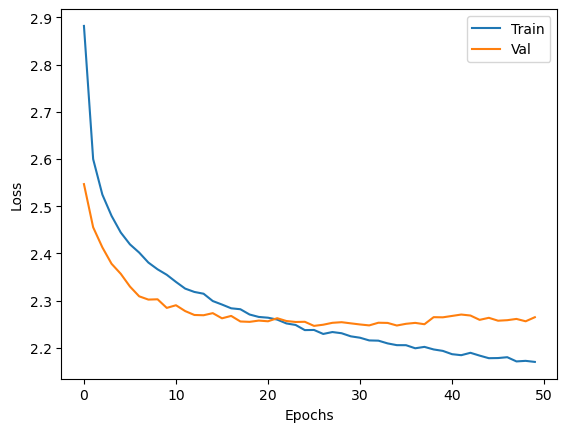

In [36]:
def pazzo5():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.0001)))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model


pazzo5 = KerasClassifier(pazzo5, callbacks=[es])
pazzo5.fit(X_train, y_train, validation_split=0.2, epochs=500)

y_pred = pazzo5.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

history = pazzo5.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/500


C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2325 - loss: 3.0218 - val_accuracy: 0.3227 - val_loss: 2.5583
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3277 - loss: 2.5398 - val_accuracy: 0.3382 - val_loss: 2.4671
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3451 - loss: 2.4606 - val_accuracy: 0.3533 - val_loss: 2.4004
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3591 - loss: 2.3946 - val_accuracy: 0.3646 - val_loss: 2.3530
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3685 - loss: 2.3448 - val_accuracy: 0.3707 - val_loss: 2.3427
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3789 - loss: 2.3139 - val_accuracy: 0.3807 - val_loss: 2.3165
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3914 - loss: 2.2775 - val_accuracy: 0.3773 - val_loss: 2.3317
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3923 - loss: 2.2569 - val_

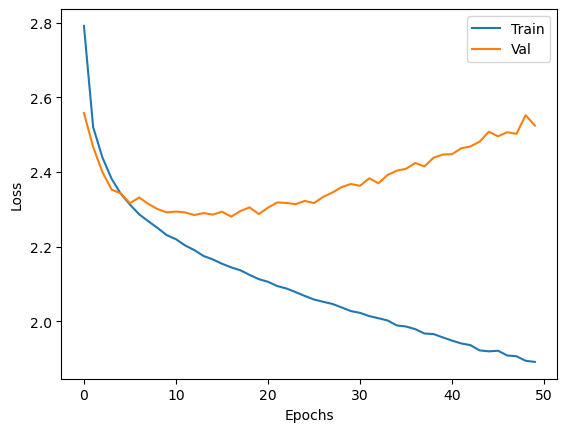

In [39]:
def pazzo6():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.0001)))
    model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.0001)))
    model.add(Dropout(0.1))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model


pazzo6 = KerasClassifier(pazzo6, callbacks=[es])
pazzo6.fit(X_train, y_train, validation_split=0.2, epochs=500)

y_pred = pazzo6.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

history = pazzo6.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1934 - loss: 3.2296 - val_accuracy: 0.3088 - val_loss: 2.6105
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2865 - loss: 2.7617 - val_accuracy: 0.3227 - val_loss: 2.5401
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3136 - loss: 2.6440 - val_accuracy: 0.3374 - val_loss: 2.4726
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3231 - loss: 2.5872 - val_accuracy: 0.3457 - val_loss: 2.4593
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3342 - loss: 2.5582 - val_accuracy: 0.3571 - val_loss: 2.4034
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3441 - loss: 2.5096 - val_accuracy: 0.3631 - val_loss: 2.3812
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3501 - loss: 2.4943 - val_accuracy: 0.3661 - val_loss: 2.3749
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3570 - loss: 

C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emasc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    afrobeat       0.38      0.16      0.22       292
     ambient       0.35      0.36      0.35       554
   bluegrass       0.35      0.44      0.39       293
       blues       0.13      0.05      0.07       347
      brazil       0.49      0.67      0.56      1454
     british       0.14      0.01      0.01       167
      comedy       0.96      0.77      0.86       298
     country       0.30      0.08      0.13       159
       dance       0.27      0.37      0.31       686
     dubstep       0.32      0.28      0.30       317
         edm       0.27      0.23      0.24       639
         emo       0.33      0.23      0.27       926
        folk       0.33      0.02      0.04       153
      french       0.29      0.14      0.18       273
        funk       0.41      0.24      0.31       177
      garage       0.25      0.02      0.04       260
      german       0.22      0.03      0.06       219
      gospel       0.26    

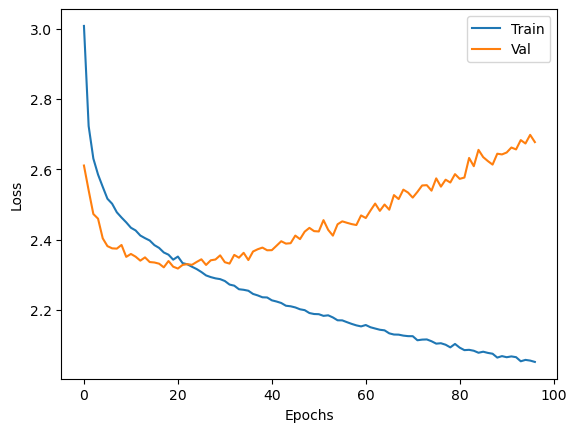

In [15]:
n_classes=50
def pazzo7():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.0001)))
    model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.0001)))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model


pazzo7 = KerasClassifier(pazzo7, callbacks=[es])
pazzo7.fit(X_train, y_train, validation_split=0.2, epochs=500)

y_pred = pazzo7.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

history = pazzo7.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Con df_class

In [18]:
df_class = pd.read_csv('df_class.csv', skipinitialspace=True)

In [19]:
df_class

,duration_sec,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,explicit,track_number,album_total_tracks,time_signature,album_type_album,album_type_compilation,album_type_single,album_release_date_precision_day,album_release_date_precision_month,album_release_date_precision_year
0,290.479,0.52,0.532,0.517,-9.846,0.4930,0.54700,0.535000,0.0854,0.2390,...,0,5,13,3,1,0,0,1,0,0
1,539.229,0.45,0.750,0.340,-12.759,0.0326,0.16700,0.648000,0.1060,0.1450,...,0,5,8,4,1,0,0,1,0,0
2,264.200,0.39,0.801,0.639,-10.681,0.1040,0.02900,0.466000,0.0688,0.3200,...,0,5,10,3,1,0,0,1,0,0
3,387.413,0.00,0.675,0.543,-11.983,0.0639,0.04840,0.719000,0.1120,0.0374,...,0,6,7,4,0,0,1,1,0,0
4,248.956,0.00,0.761,0.671,-13.346,0.0418,0.51300,0.917000,0.1150,0.1190,...,0,1,13,4,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83607,209.655,0.23,0.466,0.982,-2.674,0.0752,0.00841,0.323000,0.3580,0.3700,...,1,2,2,4,0,0,1,1,0,0
83608,205.724,0.56,0.666,0.720,-4.483,0.0269,0.37100,0.000000,0.0793,0.3120,...,1,1,1,4,0,0,1,1,0,0
83609,195.853,0.80,0.813,0.627,-5.018,0.0486,0.07710,0.000616,0.1310,0.8010,...,1,3,28,4,1,0,0,1,0,0
83610,208.698,0.60,0.653,0.779,-3.133,0.0392,0.37200,0.000001,0.0392,0.3870,...,0,1,1,4,0,0,1,1,0,0


In [20]:
X=df_class.values
y=df_track['genre_cluster'].values


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58528, 29), (25084, 29), (58528,), (25084,))

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/500


C:\Users\emasc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2076 - loss: 3.0948 - val_accuracy: 0.3257 - val_loss: 2.4663
Epoch 2/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3150 - loss: 2.5558 - val_accuracy: 0.3655 - val_loss: 2.3435
Epoch 3/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3441 - loss: 2.4329 - val_accuracy: 0.3747 - val_loss: 2.2821
Epoch 4/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3589 - loss: 2.3775 - val_accuracy: 0.3824 - val_loss: 2.2588
Epoch 5/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3717 - loss: 2.3196 - val_accuracy: 0.3924 - val_loss: 2.2214
Epoch 6/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3761 - loss: 2.2929 - val_accuracy: 0.3954 - val_loss: 2.2115
Epoch 7/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3889 - loss: 2.2628 - val_accuracy: 0.3968 - val_loss: 2.1949
Epoch 8/500
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3918 - loss: 2.2513 - val_

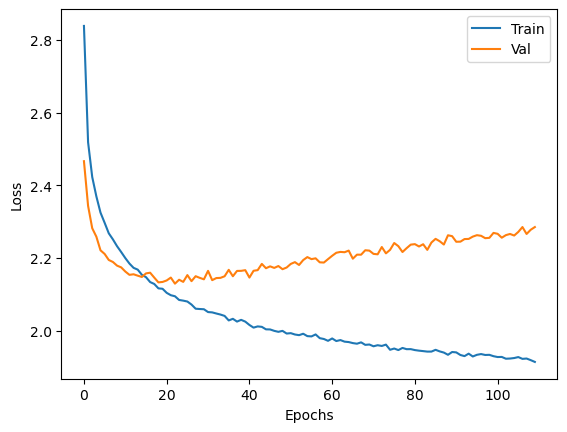

In [32]:
def pazzo5():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.0001)))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model


pazzo5 = KerasClassifier(pazzo5, callbacks=[es])
pazzo5.fit(X_train, y_train, validation_split=0.2, epochs=500)

y_pred = pazzo5.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

history = pazzo5.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()